In [2]:
import matplotlib.pyplot as plt
import os
# Replace 'animals_path' with the actual path to your data directory
animals_path = "./animal_dataset"

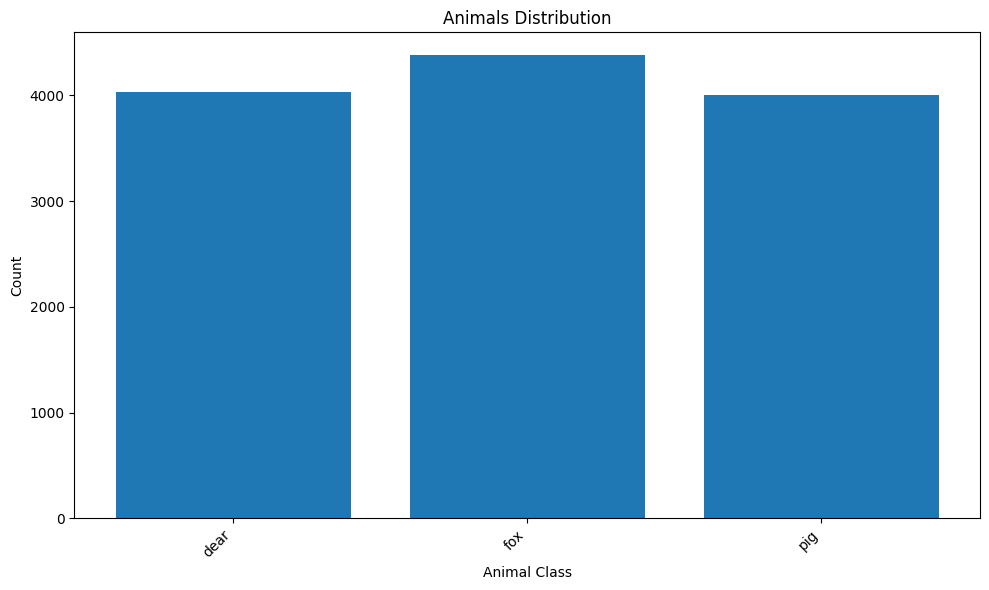

In [3]:
# Create lists to store animal class labels and counts
animal_labels = []
animal_counts = []

# Populate the lists with data
for o in os.listdir(animals_path):
    animal_labels.append(o)
    animal_counts.append(len(os.listdir(os.path.join(animals_path, o))))

# Create a bar plot to display the distribution
plt.figure(figsize=(10, 6))
plt.bar(animal_labels, animal_counts)
plt.title("Animals Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [4]:
import math 
import sys
from PIL import Image
sys.modules['Image'] = Image
import shutil
train_val_test_ratio= (0.9,0.1)
test_folder = 'test/'
train_folder ='train/'
val_folder = 'val/'
file_names = os.listdir(animals_path)

In [7]:

# Remove existing folders if they exist 
for folder in [test_folder,train_folder,val_folder]:
    if os.path.exists(folder) and os.path.exists(folder):
        shutil.rmtree(folder)

# Remake category folders in both Train and Test Folders

for category in file_names:
    os.makedirs(test_folder+category)
    os.makedirs(train_folder+category)
    os.makedirs(val_folder+category)


In [8]:
import random  
#Split Data by Train Ratio and copy files to correct directory 
for idx, category in enumerate(file_names):
    file_list = os.listdir(animals_path + '/' + category)
    random.shuffle(file_list)
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = []
    
    for i, file in enumerate(train_list):
        shutil.copy(animals_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d train images to category folder %s' % (len(train_list), category)) 
    sys.stdout.write('\n')
    
    for i, file in enumerate(val_list):
        shutil.copy(animals_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d validation images to category folder %s' % (len(val_list), category)) 
    sys.stdout.write('\n')
    
    for i, file in enumerate(test_list):
        shutil.copy(animals_path + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d test images to category folder %s' % (len(test_list), category)) 
    sys.stdout.write('\n')
    
print("Done")


Moving 3633 train images to category folder dear
Moving 403 validation images to category folder dear
Moving 0 test images to category folder dear
Moving 3940 train images to category folder fox
Moving 437 validation images to category folder fox
Moving 0 test images to category folder fox
Moving 3603 train images to category folder pig
Moving 400 validation images to category folder pig
Moving 0 test images to category folder pig
Done


In [5]:
from datetime import datetime


def accuracy_loss_plot(history, model_config):
    epochs = history.epoch
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    run_epochs = len(epochs)

    f = 1
    save_epochs = [epochs[i] for i in range(0, run_epochs, f)]
    save_tr_acc = [tr_acc[i] for i in range(0, run_epochs, f)]
    save_tr_loss = [tr_loss[i] for i in range(0, run_epochs, f)]
    save_val_acc = [val_acc[i] for i in range(0, run_epochs, f)]
    save_val_loss = [val_loss[i] for i in range(0, run_epochs, f)]

    # Create a figure and axis
    fig, ax1 = plt.subplots()

    fig.set_figheight(12)
    fig.set_figwidth(24)

    # Plot accuracy lines
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy', color='black')
    ax1.plot(save_epochs, save_tr_acc, color='#800000', marker='o', label='Training Accuracy')
    ax1.plot(save_epochs, save_val_acc, color='#000075', marker='x', label='Validation Accuracy')
    # ax1.set_xticklabels(save_epochs, rotation=90)

    # Create a second y-axis for loss lines
    ax2 = ax1.twinx()  # Share the same x-axis
    ax2.set_ylabel('Loss', color='black')
    ax2.plot(save_epochs, save_tr_loss, color='#3cb44b', marker='s', label='Training Loss')
    ax2.plot(save_epochs, save_val_loss, color='#f58231', marker='^', label='Validation Loss')
    ax2.tick_params(axis='y', labelcolor='black')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    # Set a title
    plt.title('Accuracy and Loss Over Epochs')

    accuracy_matrices_path = os.path.join(os.getcwd(), './metrics/accuracy_matrices')

    curr_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
    filename = f'{"mobilnetv2-old".lower()}-{model_config}-training_metrics_plot-{format(curr_datetime)}.png'

    if not os.path.exists(accuracy_matrices_path):
        os.makedirs(accuracy_matrices_path)

    # Save the plot to the specified folder
    destination = os.path.join(accuracy_matrices_path, filename)
    plt.savefig(destination, bbox_inches='tight')

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# importing the library for data augmentation
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)

    datagen = ImageDataGenerator(
        zoom_range=0.5,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)

        try:
            img = load_img(tmp_img_name)
            img = img_to_array(img)
            img = img.reshape((1,) + img.shape)
            #The flow function of this object generates batches of augmented data based on the provided parameters.
            batch = datagen.flow(
                img,
                batch_size=1, #processing one image at a time for augmentation.
                seed=21,
                save_to_dir=data_dir,
                save_prefix=img_name.split(".JPG")[0] + "augmented",
                save_format="JPG"
            )
            batch.next() # generates the augmented version of the current image within the loop.

        except Exception as e:
            print(f"Error processing image {img_name}: {str(e)}")


2024-01-17 22:50:05.376610: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 22:50:05.382300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 22:50:06.194697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-17 22:50:07.966931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 22:50:29.838628: W tensorflow/compiler/tf2

In [45]:
classes_to_augment = [
    "dear", "fox","pig"
]


In [7]:
for class_name in classes_to_augment:
    print("Augmentation process happening:", class_name)
    data_dir= os.path.join(train_folder,class_name)
    data_augment(data_dir)
    


Augmentation process happening: dear


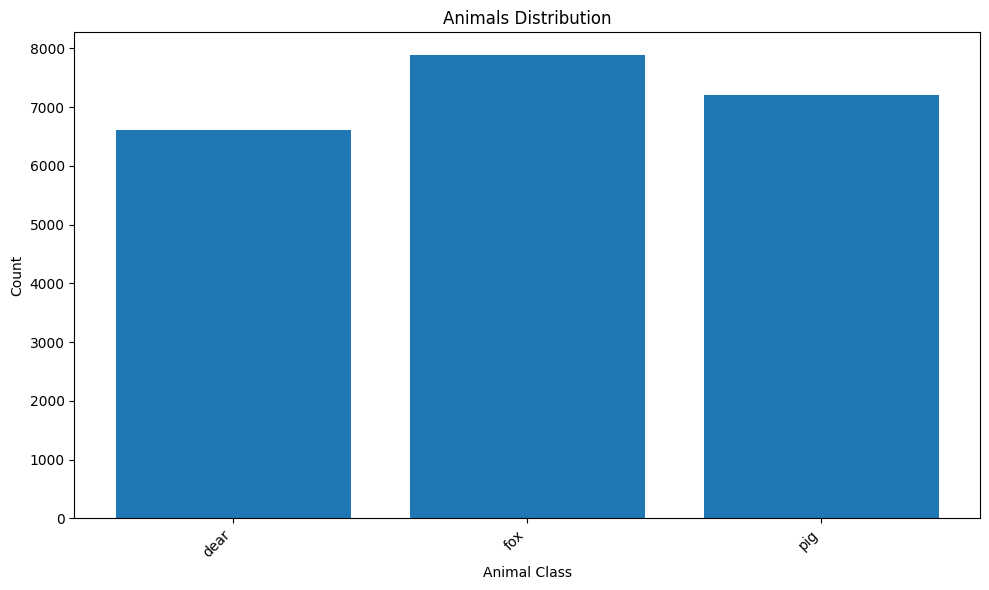

In [46]:
import matplotlib.pyplot as plt
import os

path = "./train"

# Create lists to store animal class labels and counts
animal_labels = []
animal_counts = []

# Populate the lists with data
for o in os.listdir(path):
    animal_labels.append(o)
    animal_counts.append(len(os.listdir(os.path.join(path, o))))

# Create a bar plot to display the distribution
plt.figure(figsize=(10, 6))
plt.bar(animal_labels, animal_counts)
plt.title("Animals Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [47]:
model_name = "MobileNetV2-augmented-2"

models_dir = os.path.join(os.getcwd(), 'models')
model_dir = os.path.join(models_dir, model_name)
model_save_dir = os.path.join(model_dir, model_name)
model_save_path = os.path.join(model_save_dir, model_name + "_base.h5")


if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)


   

In [48]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# Constants for MobileNet
MOBILENET_WIDTH = 224
MOBILENET_HEIGHT = 224
BATCH_SIZE = 64
test_dir = 'test/'
train_dir = 'train/'
val_dir = 'val/'

In [49]:
# Train Dataset Generator with Augmentation for MobileNet
print("\nTraining Data Set for MobileNet")
train_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input,
                                               rescale=1./255,
    )

#  preprocessing_function parameter is set to mobilenet_preprocess_input, which is likely a function used to preprocess images specifically for the MobileNet model.

#generates a flow of augmented/processed image data from a directory. It creates a generator named train_flow_mobilenet 

train_flow_mobilenet = train_generator_mobilenet.flow_from_directory(
    train_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)



Training Data Set for MobileNet
Found 21689 images belonging to 3 classes.


In [50]:
# Validation Dataset Generator with Augmentation for MobileNet
print("\nValidation Data Set for MobileNet")
val_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input,rescale=1./255,)
val_flow_mobilenet = val_generator_mobilenet.flow_from_directory(
    val_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',

)



Validation Data Set for MobileNet
Found 1240 images belonging to 3 classes.


In [51]:
# Train Dataset Generator with Augmentation for MobileNet
print("\nTest Data Set for MobileNet")
test_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input,rescale=1./255,)
test_flow_mobilenet = test_generator_mobilenet.flow_from_directory(
    test_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)



Test Data Set for MobileNet
Found 1369 images belonging to 3 classes.


In [52]:
from keras.models import Sequential, Model, load_model
from keras import optimizers, models
from keras.layers import Dense, Dropout, GlobalAveragePooling2D,BatchNormalization
from keras import applications
from keras import backend as K
import tensorflow as tf
import os

# Set the number of parallel execution units
NUM_PARALLEL_EXEC_UNITS = 8

# Configuring TensorFlow Session
config = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS,
    inter_op_parallelism_threads=1
)
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

### TensorFlow uses a session to execute operations. Here, we configure TensorFlow to use 8 threads (NUM_PARALLEL_EXEC_UNITS) for intra-operation parallelism (operations within a graph) and 1 thread for inter-operation parallelism (operations between graphs). tf.ConfigProto defines the session configuration, and K.set_session(session) sets this configuration for Keras backend.


###K.set_session(session) sets this configuration for Keras backend.

# Setting MKL and OpenMP Environment Variables:
# MKL and OpenMP
os.environ["OMP_NUM_THREADS"] = str(NUM_PARALLEL_EXEC_UNITS)
os.environ["KMP_BLOCKTIME"] = "1"
os.environ["KMP_SETTINGS"] = "1"
os.environ["KMP_AFFINITY"] = "granularity=fine,verbose,compact,1"

2024-01-18 08:10:34.793582: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 08:10:34.794973: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 08:10:34.795154: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 08:10:34.799265: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-18 08:10:34.799336: I tensorflow/core/common_runtime/gpu/gpu

In [53]:
# Initialize mobilenet with transfer learning
### Removing Top Layers (include_top=False): The top layers of a CNN typically involve the final fully connected layers responsible for classification. When include_top=False is used, these classification layers are removed, leaving the convolutional base intact.
base_model = applications.MobileNetV2(weights='imagenet',
include_top=False,
input_shape=(MOBILENET_WIDTH, MOBILENET_HEIGHT, 3))

In [54]:
from tensorflow.keras import regularizers
#add a global spatial average pooling layer
x= base_model.output
x = GlobalAveragePooling2D() (x)
# Add batch normalization
x = BatchNormalization()(x)
###Global Average Pooling Layer: It reduces the spatial dimensions of the previous layer (output of the pre-trained MobileNet) to a vector by taking the average of each channel. This helps in reducing the total number of parameters and provides a more abstract, condensed representation of the features.
# and a dense layer
x = Dense(1024, activation= 'relu',kernel_regularizer=regularizers.l2(0.01)) (x)
#add dropout layer
x = Dropout(0.5) (x)
# Add batch normalization
x = BatchNormalization()(x)
predictions = Dense(len(train_flow_mobilenet.class_indices), activation='softmax') (x)

###Dense Layer (ReLU Activation): A fully connected layer with 1024 neurons and ReLU activation function is added. This layer helps in learning high-level features from the abstract representations obtained from previous layers.

###Output Layer: Another Dense layer is added with a number of neurons equal to the number of classes in the training dataset. It uses softmax activation to output class probabilities.
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions) # The Model() function is used to define the architecture of the overall model by specifying inputs as the input layer of the pre-trained MobileNet (base_model.input) and outputs as the final predictions
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [55]:
# compile the model (should be done after setting layers to non-trainable)
base_model_learning_rate = 0.0001
model. compile(optimizer=optimizers.Adam(learning_rate=base_model_learning_rate), metrics=['accuracy', 'top_k_categorical_accuracy'], loss='categorical_crossentropy')
#  The learning rate is a hyperparameter that determines the step size taken during the optimization process to update the weights of a neural network.
model. summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_8_depthwise (Depthwi  (None, 14, 14, 384)          3456      ['block_8_expand_relu[0][0]'] 
 seConv2D)                                                                                        
                                                                                                  
 block_8_depthwise_BN (Batc  (None, 14, 14, 384)          1536      ['block_8_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_8_depthwise_relu (Re  (None, 14, 14, 384)          0         ['block_8_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_8_project (Conv2D)    (None, 14, 14, 64)           24576     ['block_8_depthwise_relu[0][0]
          

### Freezing Layers in Transfer Learning

The reason for explicitly freezing the layers of the `base_model` even though an optimizer with a learning rate is being used is to ensure that only the added layers (top layers) receive updates during training.

When compiling the model with an optimizer and a learning rate, such as using the Adam optimizer in the code:




In [56]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger

#top_layers_file_path: Path to save the best model weights.
#ModelCheckpoint: Saves the best model weights based on the lowest loss observed.
#TensorBoard: Logs information for visualization in TensorBoard.
#EarlyStopping: Stops training if loss improvement stalls after a certain number of epochs (patience set to 5).
#CSVLogger: Logs training metrics to a CSV file.
# Callbacks are functions -> to monitor and control the training process. They serve various purposes
top_layers_file_path = os.path.join(model_save_dir, model_name + "_top_layers.h5")

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='./logs', write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('./logs/mobilenetv2-old-log.csv', append=True)


initial_epochs = 20



In [57]:
# Check if GPU is available
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')
print("GPU Devices:", devices)

GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [58]:
import scipy  # Add this line
import scipy.ndimage

# Import other necessary modules
import tensorflow as tf
import math

# Assuming `model` is already defined

history = model.fit(
    train_flow_mobilenet,
    epochs=initial_epochs,
    verbose=1,
    validation_data=val_flow_mobilenet,
    validation_steps=math.ceil(val_flow_mobilenet.samples / val_flow_mobilenet.batch_size),
    steps_per_epoch=math.ceil(train_flow_mobilenet.samples / train_flow_mobilenet.batch_size),
    callbacks=[checkpoint, early, tb, csv_logger]
)


Epoch 1/20
 26/339 [=>............................] - ETA: 11:49 - loss: 11.6455 - accuracy: 0.7440 - top_k_categorical_accuracy: 1.0000

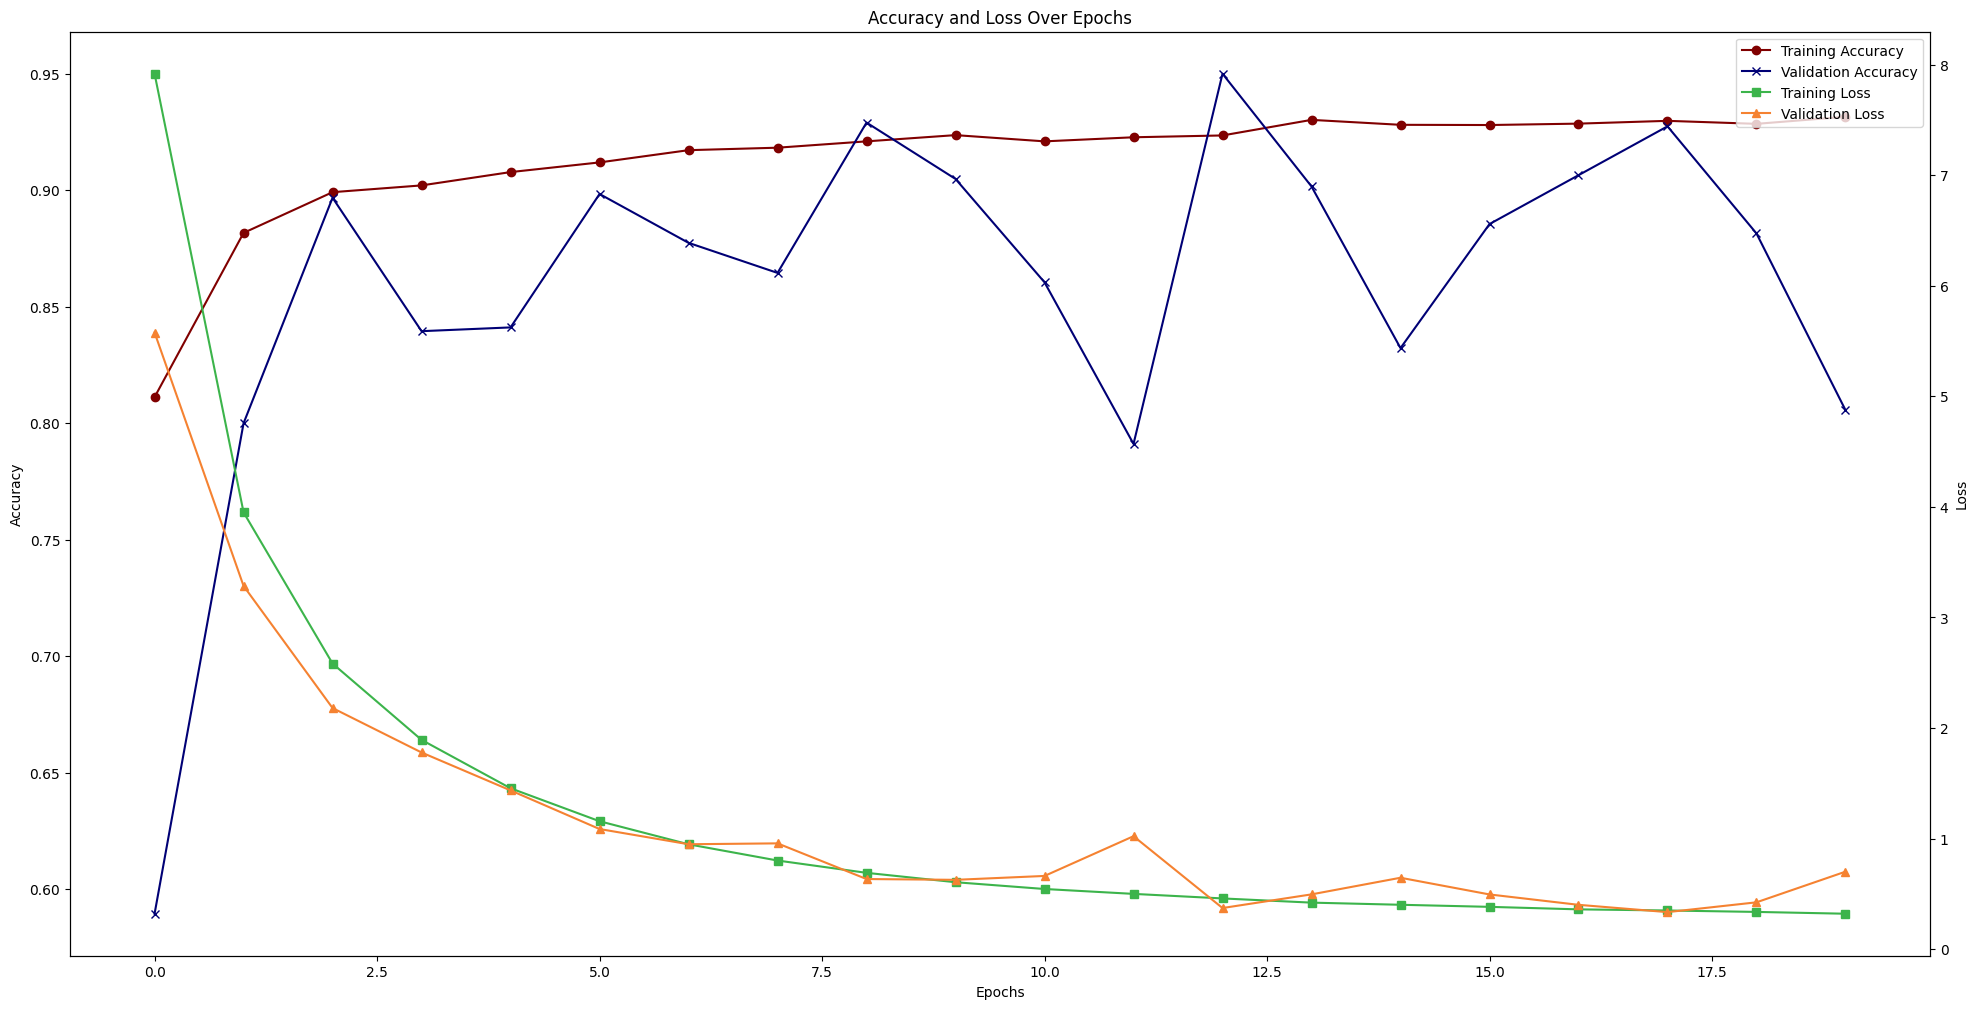

In [ ]:
accuracy_loss_plot(history, 'without_tuning')

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet base model as a fixed feature extractor.

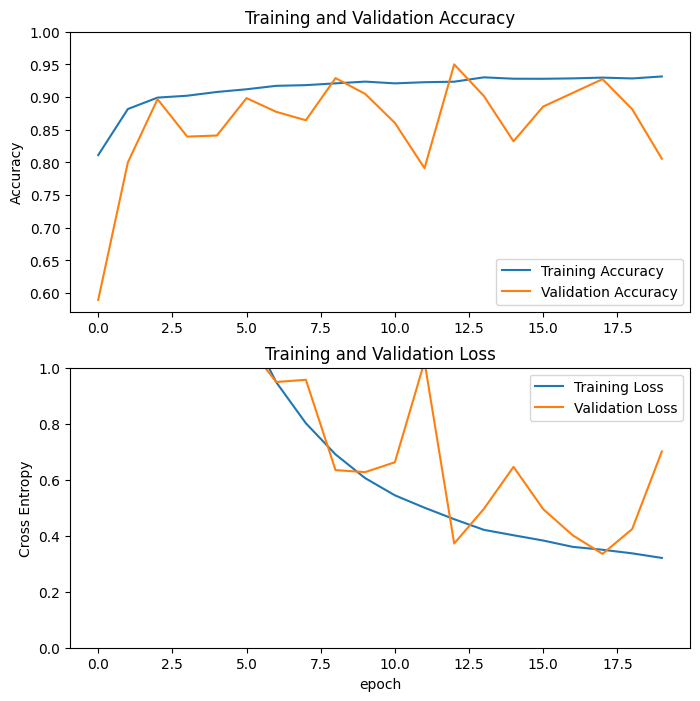

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#train acuracy

print("Train Accuracy: ", history.history['accuracy'])
print("Validation Accuracy: ", history.history['val_accuracy'])

print("Train Loss: ", history.history['loss'])
print("Validation Loss: ", history.history['val_loss'])


Train Accuracy:  [0.8111945986747742, 0.8816911578178406, 0.8991654515266418, 0.902070164680481, 0.9077873826026917, 0.9119369387626648, 0.9171930551528931, 0.918253481388092, 0.9209737777709961, 0.923647940158844, 0.9209737777709961, 0.9227257966995239, 0.9235095977783203, 0.9301950335502625, 0.9280741214752197, 0.9279819130897522, 0.9285812973976135, 0.9297800660133362, 0.928489089012146, 0.931532084941864]
Validation Accuracy:  [0.5895161032676697, 0.800000011920929, 0.896774172782898, 0.8395161032676697, 0.8411290049552917, 0.89838707447052, 0.8774193525314331, 0.8645161390304565, 0.9290322661399841, 0.9048386812210083, 0.8604838848114014, 0.7911290526390076, 0.949999988079071, 0.9016128778457642, 0.8322580456733704, 0.8854838609695435, 0.9064516425132751, 0.9274193644523621, 0.8814516067504883, 0.8056451678276062]
Train Loss:  [7.916861534118652, 3.9501492977142334, 2.582937002182007, 1.8928481340408325, 1.455179214477539, 1.1570628881454468, 0.9484622478485107, 0.801731288433075,

### Fine Tuning

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compile the model
As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_model_learning_rate/10),
              metrics=[tf.keras.metrics.CategoricalCrossentropy(), 'accuracy', 'top_k_categorical_accuracy'])

In [ ]:
model.summary()
len(model.trainable_variables)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

62

### Continue Train the model

In [ ]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_flow_mobilenet,
                                   epochs=total_epochs,
                                   initial_epoch=history.epoch[-1],
                                   verbose=1,
                                   validation_data=val_flow_mobilenet,
                                   validation_steps=math.ceil(val_flow_mobilenet.samples / val_flow_mobilenet.batch_size),
                                   steps_per_epoch=math.ceil(train_flow_mobilenet.samples / train_flow_mobilenet.batch_size),
                                   callbacks=[checkpoint, early, tb, csv_logger])

Epoch 20/40
339/339 [==============================] - ETA: 0s - loss: 0.7761 - categorical_crossentropy: 0.6472 - accuracy: 0.8247 - top_k_categorical_accuracy: 1.0000
Epoch 20: loss did not improve from 0.32070
339/339 [==============================] - 814s 2s/step - loss: 0.7761 - categorical_crossentropy: 0.6472 - accuracy: 0.8247 - top_k_categorical_accuracy: 1.0000 - val_loss: 29.9028 - val_categorical_crossentropy: 29.7744 - val_accuracy: 0.3250 - val_top_k_categorical_accuracy: 1.0000
Epoch 21/40
339/339 [==============================] - ETA: 0s - loss: 0.3966 - categorical_crossentropy: 0.2689 - accuracy: 0.9092 - top_k_categorical_accuracy: 1.0000
Epoch 21: loss did not improve from 0.32070
339/339 [==============================] - 778s 2s/step - loss: 0.3966 - categorical_crossentropy: 0.2689 - accuracy: 0.9092 - top_k_categorical_accuracy: 1.0000 - val_loss: 31.6290 - val_categorical_crossentropy: 31.5022 - val_accuracy: 0.3250 - val_top_k_categorical_accuracy: 1.0000
Ep

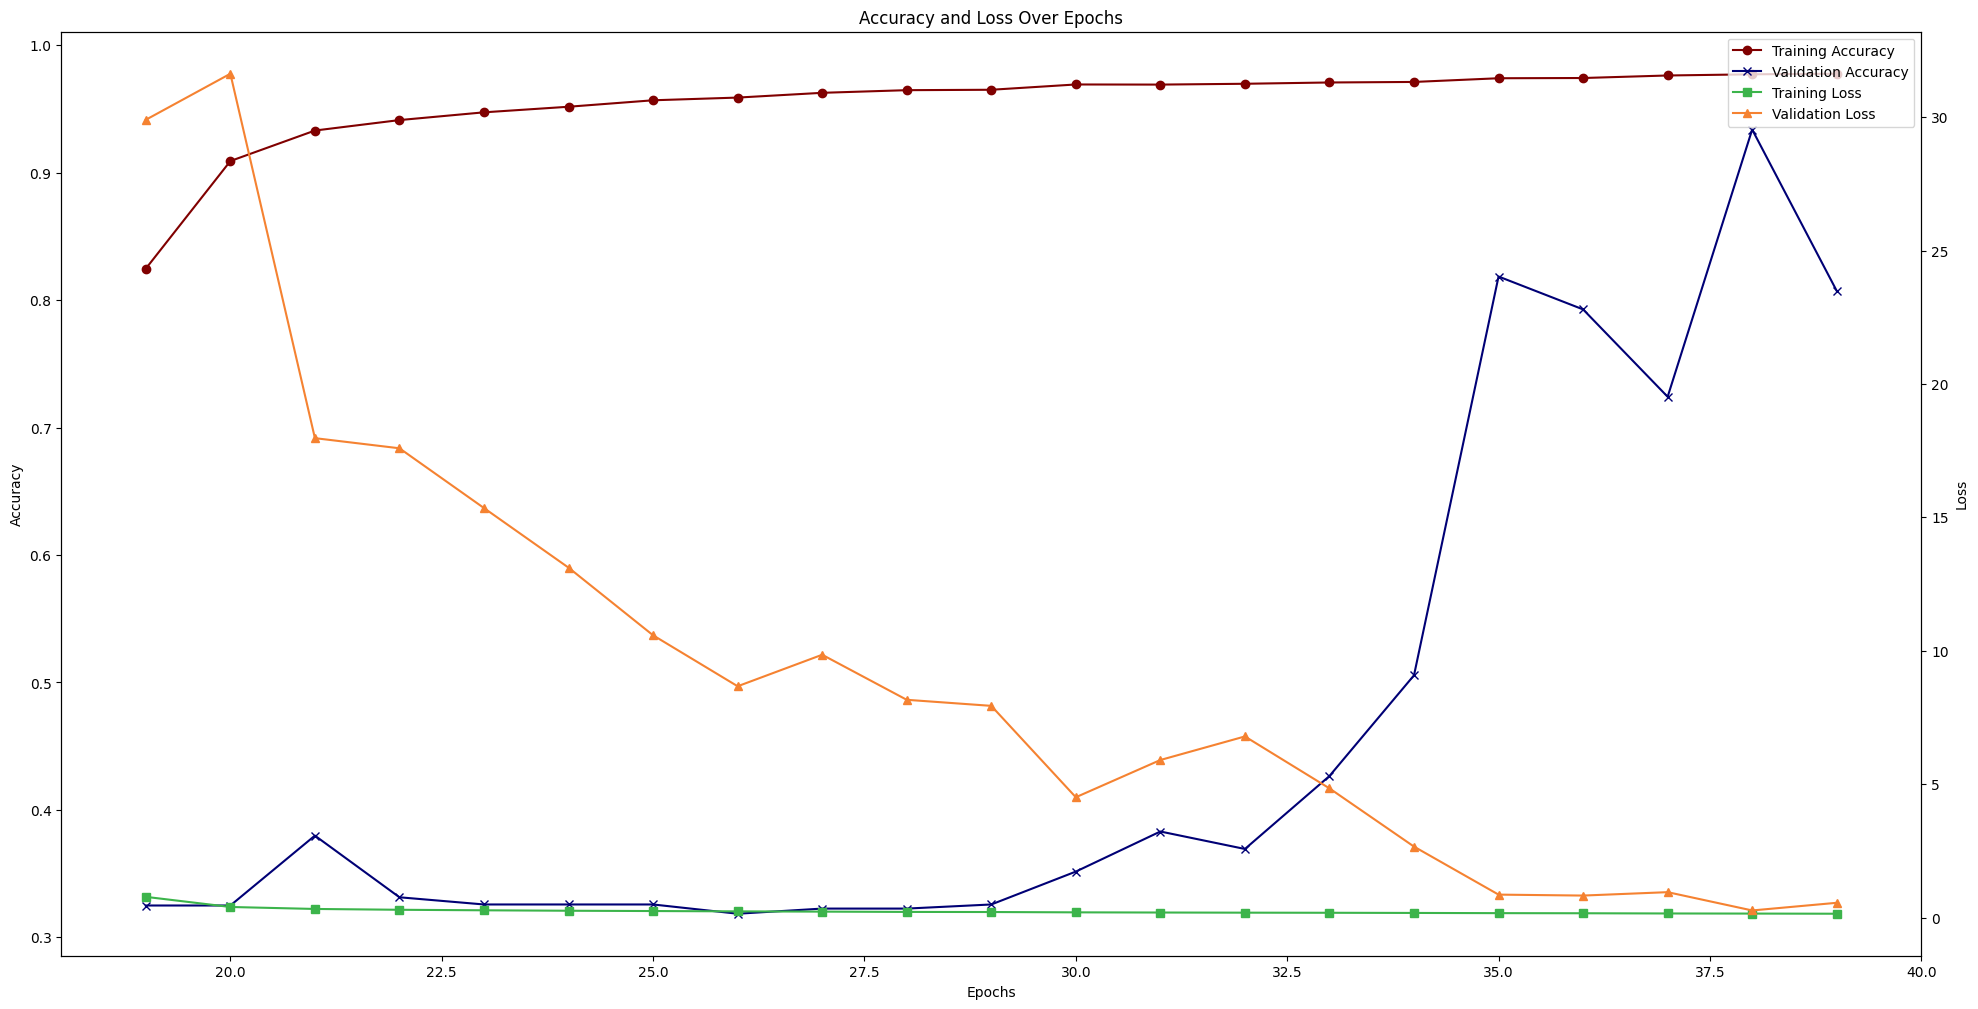

In [ ]:
accuracy_loss_plot(history_fine, 'with_tuning')

### Learning curves

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

print("accuracy: ",acc)
print("val accuracy: ", val_acc)

print("loss: ",loss)
print("val loss: ",val_loss)

accuracy:  [0.8247498869895935, 0.9091705679893494, 0.9330997467041016, 0.9413066506385803, 0.9473927021026611, 0.9517728090286255, 0.9568445086479187, 0.9589653611183167, 0.9627000093460083, 0.9647747874259949, 0.9650974869728088, 0.9692471027374268, 0.9691548943519592, 0.9698003530502319, 0.9708147048950195, 0.9712296724319458, 0.9741343259811401, 0.97431880235672, 0.976301372051239, 0.9772234559059143, 0.9776845574378967]
val accuracy:  [0.32499998807907104, 0.32499998807907104, 0.3798387050628662, 0.3314516246318817, 0.3258064389228821, 0.3258064389228821, 0.3258064389228821, 0.31854838132858276, 0.32258063554763794, 0.32258063554763794, 0.3258064389228821, 0.3516128957271576, 0.38306450843811035, 0.36935484409332275, 0.426612913608551, 0.5056451559066772, 0.8185483813285828, 0.7927419543266296, 0.7241935729980469, 0.9338709712028503, 0.8072580695152283]
loss:  [0.7760573029518127, 0.3965636193752289, 0.3224664032459259, 0.2916838824748993, 0.2722748816013336, 0.2556195557117462, 0

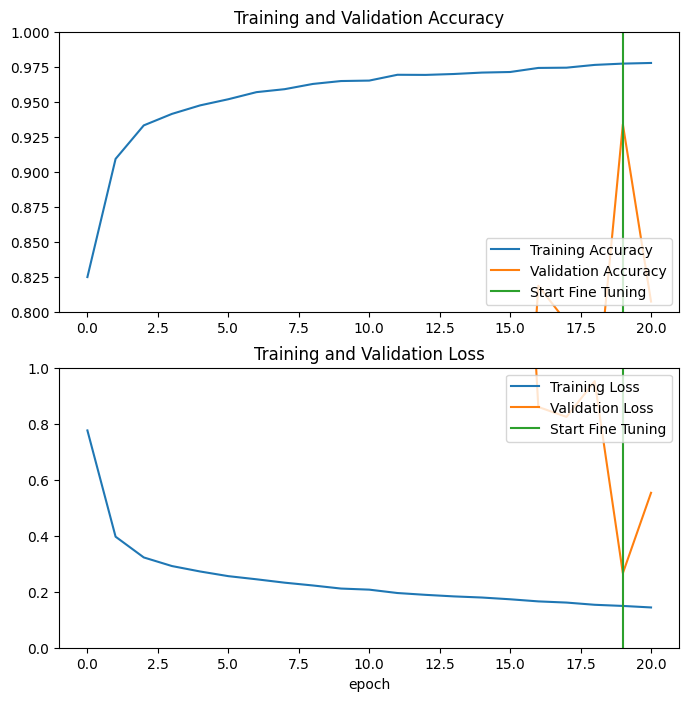

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluate the model

In [ ]:
# Evaluate the test accuracy
result = model.evaluate(test_flow_mobilenet,
                                   verbose=True,
                                   steps=math.ceil(test_flow_mobilenet.samples / test_flow_mobilenet.batch_size))

# Extract loss and accuracy from the result
loss, acc = result[0], result[2]

print("Loss:", loss)
print("Accuracy:", acc)

22/22 [==============================] - 60s 3s/step - loss: 2.1902 - categorical_crossentropy: 2.1124 - accuracy: 0.5427 - top_k_categorical_accuracy: 1.0000
Loss: 2.1901886463165283
Accuracy: 0.5427319407463074


In [ ]:
print(model.metrics_names)
target_names = ['dear', 'fox','pig']

['loss', 'categorical_crossentropy', 'accuracy', 'top_k_categorical_accuracy']


In [ ]:


import tracemalloc


tracemalloc.start()
# Assuming model is your trained model and test_flow_mobilenet is your test data generator
predictions = model.predict(test_flow_mobilenet, steps=len(test_flow_mobilenet), verbose=1)
predictions = np.argmax(predictions, axis=1)
currrent_mem, peak_mem = map(lambda x: x/10**3, tracemalloc.get_traced_memory())
tracemalloc.stop()


22/22 [==============================] - 46s 2s/step


In [ ]:
#want to print fully array
print(test_flow_mobilenet.classes)
print(predictions)

[0 0 0 ... 2 2 2]
[0 2 0 ... 0 2 0]


In [ ]:

from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


acc = accuracy_score(test_flow_mobilenet.classes, predictions)
precision = precision_score(test_flow_mobilenet.classes, predictions, average='macro')
recall = recall_score(test_flow_mobilenet.classes, predictions, average='macro')
f1 = f1_score(test_flow_mobilenet.classes, predictions, average='macro')

metrics_path = os.path.join(os.getcwd(), './metrics/metric_values')
curr_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
filename = f'{model_name}-metrics-{format(curr_datetime)}.txt'

if not os.path.exists(metrics_path):
    os.makedirs(metrics_path)

file_path = os.path.join(metrics_path, filename)
with open(file_path, 'w') as file:
    file.write(f'Accuracy: {acc:.3f}\n')
    file.write(f'Precision: {precision:.3f}\n')
    file.write(f'Recall: {recall:.3f}\n')
    file.write(f'F1 Score: {f1:.3f}\n')
    file.write(f"Current Memory: {currrent_mem:.3f} KB\n")
    file.write(f"Peak Memory: {peak_mem:.3f} KB\n")
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f"Current Memory: {currrent_mem:.3f} KB")
print(f"Peak Memory: {peak_mem:.3f} KB")

Accuracy: 0.370
Precision: 0.327
Recall: 0.341
F1 Score: 0.298
Current Memory: 2012.325 KB
Peak Memory: 80588.943 KB


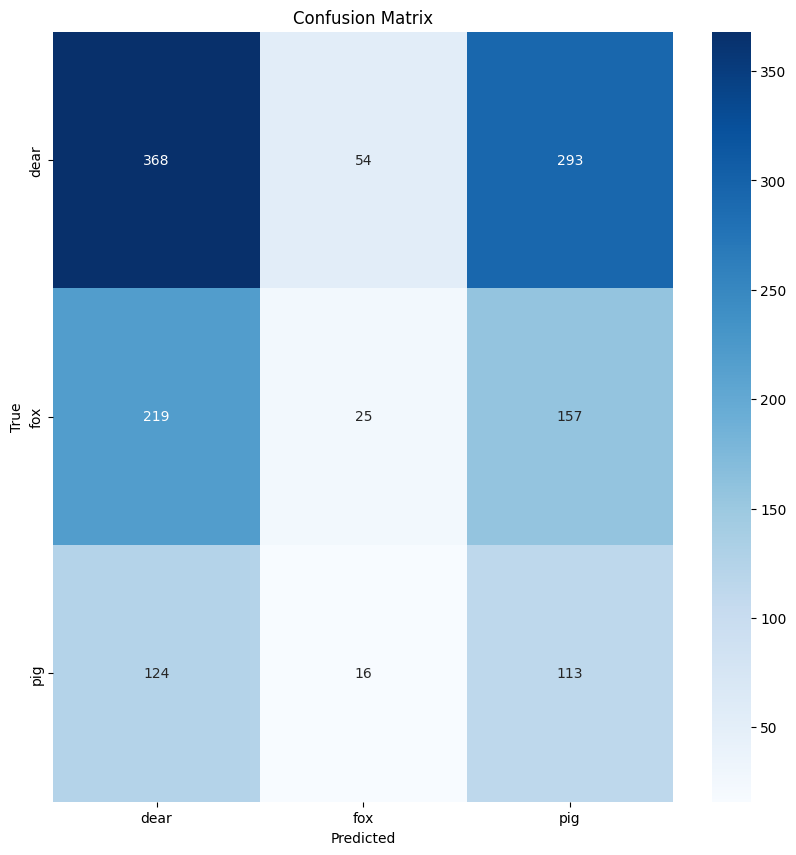

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix_res = confusion_matrix(test_flow_mobilenet.classes, predictions)

class_labels = ['dear', 'fox','pig']

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_res, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

confusion_matrix_path = os.path.join(os.getcwd(), './metrics_resnet/confusion_matrices')
curr_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
filename = f'{"mobilnetv2-old"}-confusion_matrix-{format(curr_datetime)}.png'

if not os.path.exists(confusion_matrix_path):
    os.makedirs(confusion_matrix_path)

# Save the plot to the specified folder
save_path = os.path.join(confusion_matrix_path, filename)
plt.savefig(save_path, bbox_inches='tight')

In [ ]:
from itertools import cycle
from sklearn.calibration import label_binarize
from sklearn.metrics import auc, roc_curve


num_labels=3
def get_ROC_AUC(y_pred, y_target):
    # Binarize the labels
    n_classes = num_labels
    true_labels_bin = label_binarize(y_target, classes=range(n_classes))
    predicted_labels_bin = label_binarize(y_pred, classes=range(n_classes))

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        print()
        fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    return fpr, tpr, roc_auc

def save_ROC_AUC(fpr, tpr, roc_auc):
    n_classes = num_labels

    # Plot ROC curves for each class
    plt.figure(figsize=(12, 12))

    hex_colors = [
        "#FF0000",  # Red
        "#00FF00",  # Green
        "#0000FF",  # Blue
        "#FFFF00",  # Yellow
        "#FF00FF",  # Magenta
        "#00FFFF",  # Cyan
        "#FFA500",  # Orange
        "#FF4500",  # OrangeRed
        "#FFD700",  # Gold
        "#8A2BE2",  # BlueViolet
        "#7FFF00",  # Chartreuse
        "#DC143C",  # Crimson
        "#48D1CC",  # MediumTurquoise
        "#2E8B57",  # SeaGreen
        "#800080",  # Purple
        "#ADFF2F",  # GreenYellow
        "#FF1493",  # DeepPink
        "#9370DB",  # MediumPurple
        "#8B4513",  # SaddleBrown
        "#20B2AA",  # LightSeaGreen
        "#8B008B",  # DarkMagenta
        "#FF6347",  # Tomato
        "#556B2F",  # DarkOliveGreen
        "#6B8E23",  # OliveDrab
        "#BDB76B",  # DarkKhaki
        "#808080",  # Gray
        "#DAA520",  # GoldenRod
    ]

    colors = cycle(hex_colors)  # Adjust as needed for your number of classes

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                    label=f'{class_labels[i]} (AUC = {roc_auc[i]:.3f})')

    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve and AUC')
    plt.legend(loc='lower right')

    roc_auc_path = os.path.join(os.getcwd(), './metrics/roc_auc')
    curr_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
    filename = f'{model_name.lower()}-roc_auc-{format(curr_datetime)}.png'

    if not os.path.exists(roc_auc_path):
        os.makedirs(roc_auc_path)

    # Save the plot to the specified folder
    save_path = os.path.join(roc_auc_path, filename)
    plt.savefig(save_path, bbox_inches='tight')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_flow_mobilenet.classes, predictions,target_names = target_names))

              precision    recall  f1-score   support

        dear       0.52      0.51      0.52       715
         fox       0.26      0.06      0.10       401
         pig       0.20      0.45      0.28       253

    accuracy                           0.37      1369
   macro avg       0.33      0.34      0.30      1369
weighted avg       0.38      0.37      0.35      1369



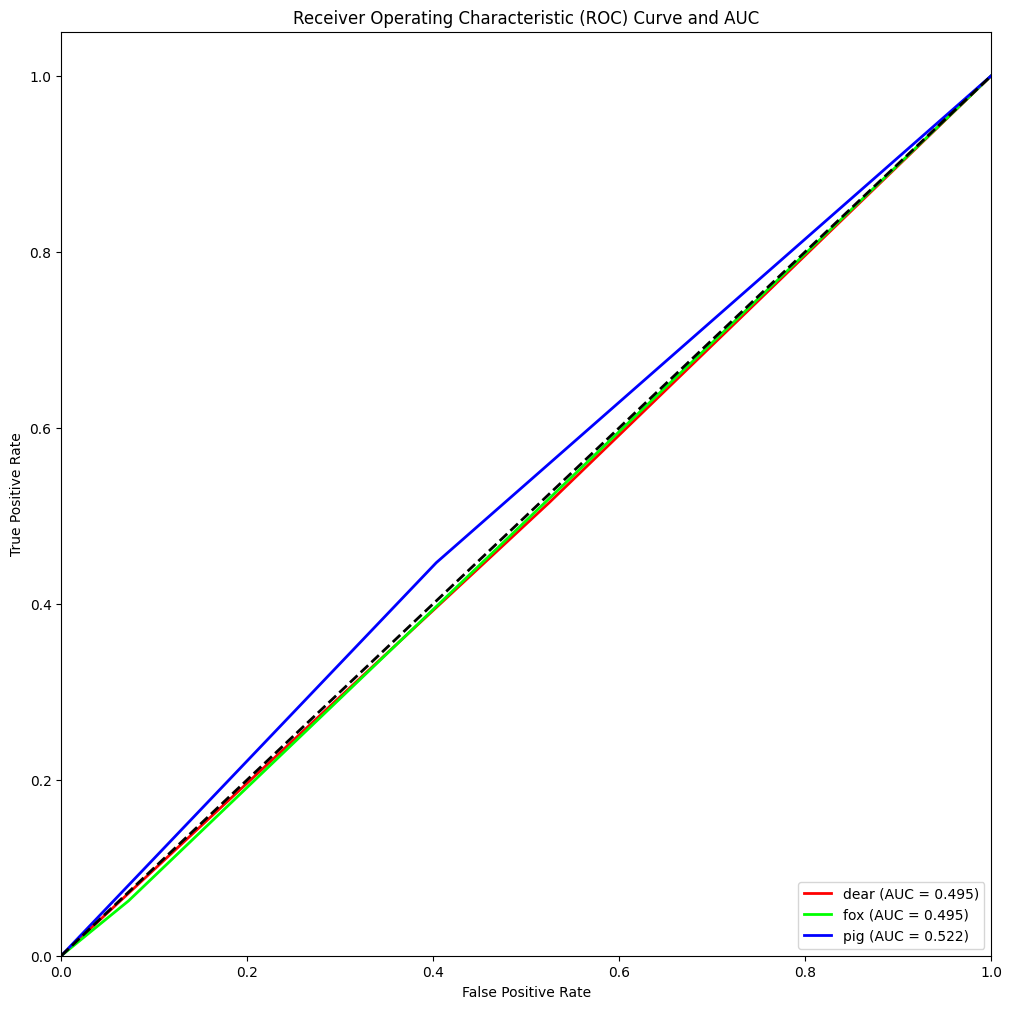

In [ ]:
fpr, tpr, roc_auc = get_ROC_AUC(predictions, test_flow_mobilenet.classes)
save_ROC_AUC(fpr, tpr, roc_auc)

In [ ]:
model. load_weights (top_layers_file_path)

In [ ]:
#save weights of the trained model to the specified folder
model.save_weights(os.path.join(model_save_dir, model_name + "_weights.h5"))



In [ ]:
#save model to the specified folder
model.save(os.path.join(model_save_dir, model_name + ".h5"))

/mnt/c/Users/sumeela/FYP/Animal-Classification-at-Edge/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#convert to tflite and save to new folder called tflite_models
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_models_dir = os.path.join(os.getcwd(), 'tflite_models')
tflite_model_dir = os.path.join(tflite_models_dir, model_name)

if not os.path.exists(tflite_model_dir):
    os.makedirs(tflite_model_dir)

tflite_model_save_path = os.path.join(tflite_model_dir, model_name + ".tflite")
with open(tflite_model_save_path, 'wb') as f:
    f.write(tflite_model)




INFO:tensorflow:Assets written to: /tmp/tmpgs4q36cp/assets


INFO:tensorflow:Assets written to: /tmp/tmpgs4q36cp/assets
2024-01-18 08:00:59.566294: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-18 08:00:59.566915: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-18 08:00:59.586408: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpgs4q36cp
2024-01-18 08:00:59.620771: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-18 08:00:59.620813: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpgs4q36cp
2024-01-18 08:00:59.691753: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-01-18 08:00:59.734875: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-01-18 08:01:00.724036: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio